In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import pandas_profiling
import cufflinks as cf
cf.set_config_file(offline=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
df = pd.read_csv('Bengaluru_bulls.csv',index_col=0)

In [4]:
df.head()

,OVERALL,SEASON 7,SEASON 6,SEASON 5,SEASON 4,SEASON 3,SEASON 2,SEASON 1,Team-name
SEASONS,,,,,,,,,
MATCHES PLAYED,123.0,17.0,24.0,22.0,14.0,14.0,16.0,16.0,bengaluru-bulls
WINS,57.0,9.0,15.0,8.0,5.0,2.0,10.0,8.0,bengaluru-bulls
DRAWS,7.0,0.0,2.0,3.0,1.0,0.0,0.0,1.0,bengaluru-bulls
LOSSES,59.0,8.0,7.0,11.0,8.0,12.0,6.0,7.0,bengaluru-bulls
FINISHING POSITION,0.0,4.0,1.0,4.0,6.0,7.0,3.0,3.0,bengaluru-bulls


In [5]:
df1 = df.transpose()

In [6]:
df2 = df1.apply(pd.to_numeric, errors='coerce')

In [35]:
df2

SEASONS,MATCHES PLAYED,WINS,DRAWS,LOSSES,FINISHING POSITION,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,...,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,123.0,57.0,7.0,59.0,0.0,5242.0,1779.0,1224.0,2239.0,0.43,...,1152.0,0.463415,0.056911,0.479675,0.233499,0.427127,14.471545,3.772358,0.603570,1.211382
SEASON 7,17.0,9.0,0.0,8.0,4.0,709.0,278.0,192.0,239.0,0.50,...,171.0,0.529412,0.000000,0.470588,0.270804,0.337094,15.529412,5.117647,0.617571,1.058824
SEASON 6,24.0,15.0,2.0,7.0,1.0,1005.0,431.0,211.0,363.0,0.54,...,230.0,0.625000,0.083333,0.291667,0.209950,0.361194,17.833333,4.958333,0.601818,1.541667
SEASON 5,22.0,8.0,3.0,11.0,4.0,943.0,336.0,195.0,412.0,0.42,...,200.0,0.363636,0.136364,0.500000,0.206787,0.436903,13.363636,4.500000,0.614583,1.272727
SEASON 4,14.0,5.0,1.0,8.0,6.0,605.0,157.0,143.0,305.0,0.33,...,124.0,0.357143,0.071429,0.571429,0.236364,0.504132,10.500000,3.857143,0.620209,0.642857
SEASON 3,14.0,2.0,0.0,12.0,7.0,603.0,158.0,148.0,297.0,0.35,...,100.0,0.142857,0.000000,0.857143,0.245439,0.492537,12.928571,2.000000,0.676976,0.857143
SEASON 2,16.0,10.0,0.0,6.0,3.0,730.0,194.0,163.0,373.0,0.35,...,164.0,0.625000,0.000000,0.375000,0.223288,0.510959,13.875000,1.875000,0.536657,1.562500
SEASON 1,16.0,8.0,1.0,7.0,3.0,647.0,225.0,172.0,250.0,0.45,...,163.0,0.500000,0.062500,0.437500,0.265842,0.386399,15.250000,2.937500,0.566572,1.250000
Team-name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df2['WIN%'] = df2['WINS']/df2['MATCHES PLAYED']
df2['DRAW%'] = df2['DRAWS']/df2['MATCHES PLAYED']
df2['LOSS%'] = df2['LOSSES']/df2['MATCHES PLAYED']
df2['WIN-LOSS%'] = df2['WINS']/df2['LOSSES']


In [37]:
df2.dtypes

SEASONS
MATCHES PLAYED          float64
WINS                    float64
DRAWS                   float64
LOSSES                  float64
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESSFUL RAIDS        float64
UNSUCCESSFUL RAID       float64
EMPTY RAIDS             float64
SUCCESS RAID %          float64
NO. OF SUPER RAIDS      float64
RAID TOUCH POINTS       float64
RAID BONUS POINTS       float64
TOTAL RAID POINTS       float64
TOTAL TACKLES           float64
SUCCESSFUL TACKLES      float64
UNSUCCESFUL TACKLES     float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
ALL OUTS INFLICTED      float64
TOTAL ALL OUT POINTS    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
UNSUCCESSFUL RAID%      float64
EMPTY RAID%             float64
AVG_RAID_TOUCH_POINT    float64
AVG_RAID_BONUS_POINT    float64
UNSUCCESSFUL TACKLE%    float64
AVG_ALL_OUTS            float64


In [38]:
df2['UNSUCCESSFUL RAID%'] = df2['UNSUCCESSFUL RAID']/df2['TOTAL RAIDS']
df2['EMPTY RAID%'] = df2['EMPTY RAIDS']/df2['TOTAL RAIDS']
df2['AVG_RAID_TOUCH_POINT'] = df2['RAID TOUCH POINTS']/df2['MATCHES PLAYED']
df2['AVG_RAID_BONUS_POINT'] = df2['RAID BONUS POINTS']/df2['MATCHES PLAYED']
df2['UNSUCCESSFUL TACKLE%'] = df2['UNSUCCESFUL TACKLES']/df2['TOTAL TACKLES']
df2['AVG_ALL_OUTS'] = df2['ALL OUTS INFLICTED']/df2['MATCHES PLAYED']

In [39]:
df6 = df2.drop(['MATCHES PLAYED','WINS','DRAWS','LOSSES','SUCCESSFUL RAIDS','UNSUCCESSFUL RAID','EMPTY RAIDS','NO. OF SUPER RAIDS','RAID TOUCH POINTS','RAID BONUS POINTS','TOTAL RAID POINTS','TOTAL TACKLES','SUCCESSFUL TACKLES','UNSUCCESFUL TACKLES','ALL OUTS INFLICTED','TOTAL ALL OUT POINTS'],axis=1)

In [40]:
df6 = df6.drop(['Team-name'],axis=0)
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS,WIN-LOSS%
OVERALL,0.0,5242.0,0.43,0.43,93.0,1152.0,0.463415,0.056911,0.479675,0.233499,0.427127,14.471545,3.772358,0.603570,1.211382,0.966102
SEASON 7,4.0,709.0,0.50,0.44,25.0,171.0,0.529412,0.000000,0.470588,0.270804,0.337094,15.529412,5.117647,0.617571,1.058824,1.125000
SEASON 6,1.0,1005.0,0.54,0.42,12.0,230.0,0.625000,0.083333,0.291667,0.209950,0.361194,17.833333,4.958333,0.601818,1.541667,2.142857
SEASON 5,4.0,943.0,0.42,0.42,17.0,200.0,0.363636,0.136364,0.500000,0.206787,0.436903,13.363636,4.500000,0.614583,1.272727,0.727273
SEASON 4,6.0,605.0,0.33,0.43,15.0,124.0,0.357143,0.071429,0.571429,0.236364,0.504132,10.500000,3.857143,0.620209,0.642857,0.625000
SEASON 3,7.0,603.0,0.35,0.34,7.0,100.0,0.142857,0.000000,0.857143,0.245439,0.492537,12.928571,2.000000,0.676976,0.857143,0.166667
SEASON 2,3.0,730.0,0.35,0.48,7.0,164.0,0.625000,0.000000,0.375000,0.223288,0.510959,13.875000,1.875000,0.536657,1.562500,1.666667
SEASON 1,3.0,647.0,0.45,0.46,10.0,163.0,0.500000,0.062500,0.437500,0.265842,0.386399,15.250000,2.937500,0.566572,1.250000,1.142857


In [41]:
df6.dtypes

SEASONS
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESS RAID %          float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
UNSUCCESSFUL RAID%      float64
EMPTY RAID%             float64
AVG_RAID_TOUCH_POINT    float64
AVG_RAID_BONUS_POINT    float64
UNSUCCESSFUL TACKLE%    float64
AVG_ALL_OUTS            float64
WIN-LOSS%               float64
dtype: object

In [42]:
df6.corr().iplot(kind='heatmap',colorscale='ylgn')

In [43]:
df3= df2.loc['SEASON 5',:]

In [44]:
df3 

SEASONS
MATCHES PLAYED           22.000000
WINS                      8.000000
DRAWS                     3.000000
LOSSES                   11.000000
FINISHING POSITION        4.000000
TOTAL RAIDS             943.000000
SUCCESSFUL RAIDS        336.000000
UNSUCCESSFUL RAID       195.000000
EMPTY RAIDS             412.000000
SUCCESS RAID %            0.420000
NO. OF SUPER RAIDS        5.000000
RAID TOUCH POINTS       294.000000
RAID BONUS POINTS        99.000000
TOTAL RAID POINTS       393.000000
TOTAL TACKLES           480.000000
SUCCESSFUL TACKLES      185.000000
UNSUCCESFUL TACKLES     295.000000
SUCCESSFUL TACKLE %       0.420000
NO. OF SUPER TACKLES     17.000000
ALL OUTS INFLICTED       28.000000
TOTAL ALL OUT POINTS     56.000000
TOTAL DEFENCE POINTS    200.000000
WIN%                      0.363636
DRAW%                     0.136364
LOSS%                     0.500000
UNSUCCESSFUL RAID%        0.206787
EMPTY RAID%               0.436903
AVG_RAID_TOUCH_POINT     13.363636
AVG_RAID_BON

In [45]:
df3.iplot(kind='bar')

In [46]:
df4 =df6.drop('FINISHING POSITION',axis=1)
df4 =df4.drop(['SEASON 7'])
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS,WIN-LOSS%
OVERALL,5242.0,0.43,0.43,93.0,1152.0,0.463415,0.056911,0.479675,0.233499,0.427127,14.471545,3.772358,0.603570,1.211382,0.966102
SEASON 6,1005.0,0.54,0.42,12.0,230.0,0.625000,0.083333,0.291667,0.209950,0.361194,17.833333,4.958333,0.601818,1.541667,2.142857
SEASON 5,943.0,0.42,0.42,17.0,200.0,0.363636,0.136364,0.500000,0.206787,0.436903,13.363636,4.500000,0.614583,1.272727,0.727273
SEASON 4,605.0,0.33,0.43,15.0,124.0,0.357143,0.071429,0.571429,0.236364,0.504132,10.500000,3.857143,0.620209,0.642857,0.625000
SEASON 3,603.0,0.35,0.34,7.0,100.0,0.142857,0.000000,0.857143,0.245439,0.492537,12.928571,2.000000,0.676976,0.857143,0.166667
SEASON 2,730.0,0.35,0.48,7.0,164.0,0.625000,0.000000,0.375000,0.223288,0.510959,13.875000,1.875000,0.536657,1.562500,1.666667
SEASON 1,647.0,0.45,0.46,10.0,163.0,0.500000,0.062500,0.437500,0.265842,0.386399,15.250000,2.937500,0.566572,1.250000,1.142857


In [47]:
df5 = df6['FINISHING POSITION']
df5 = df5.drop(['SEASON 7'],axis=0)
#df5['FINISHING POSITION'] = df['FINISHING POSITION'].fillna(0)
df5

OVERALL     0.0
SEASON 6    1.0
SEASON 5    4.0
SEASON 4    6.0
SEASON 3    7.0
SEASON 2    3.0
SEASON 1    3.0
Name: FINISHING POSITION, dtype: float64

In [48]:
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS,WIN-LOSS%
OVERALL,5242.0,0.43,0.43,93.0,1152.0,0.463415,0.056911,0.479675,0.233499,0.427127,14.471545,3.772358,0.603570,1.211382,0.966102
SEASON 6,1005.0,0.54,0.42,12.0,230.0,0.625000,0.083333,0.291667,0.209950,0.361194,17.833333,4.958333,0.601818,1.541667,2.142857
SEASON 5,943.0,0.42,0.42,17.0,200.0,0.363636,0.136364,0.500000,0.206787,0.436903,13.363636,4.500000,0.614583,1.272727,0.727273
SEASON 4,605.0,0.33,0.43,15.0,124.0,0.357143,0.071429,0.571429,0.236364,0.504132,10.500000,3.857143,0.620209,0.642857,0.625000
SEASON 3,603.0,0.35,0.34,7.0,100.0,0.142857,0.000000,0.857143,0.245439,0.492537,12.928571,2.000000,0.676976,0.857143,0.166667
SEASON 2,730.0,0.35,0.48,7.0,164.0,0.625000,0.000000,0.375000,0.223288,0.510959,13.875000,1.875000,0.536657,1.562500,1.666667
SEASON 1,647.0,0.45,0.46,10.0,163.0,0.500000,0.062500,0.437500,0.265842,0.386399,15.250000,2.937500,0.566572,1.250000,1.142857


In [49]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = df4
y= df5
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape


(7, 8)

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['FEATURES','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                FEATURES         Score
0            TOTAL RAIDS  12464.258875
4   TOTAL DEFENCE POINTS   2785.852086
3   NO. OF SUPER TACKLES    252.065217
14             WIN-LOSS%      2.369015
11  AVG_RAID_BONUS_POINT      2.319537


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[0.05333333 0.04375    0.11166667 0.05541667 0.05508333 0.
 0.0175     0.08041667 0.0525     0.         0.05133333 0.205
 0.135      0.03816667 0.10083333]


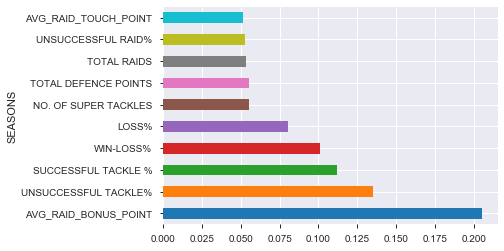

In [51]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [52]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES', 'WIN%', 'DRAW%', 'LOSS%',
       'UNSUCCESSFUL RAID%', 'EMPTY RAID%', 'AVG_RAID_TOUCH_POINT',
       'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%', 'AVG_ALL_OUTS',
       'WIN-LOSS%'],
      dtype='object')


In [53]:
X_features = df4.filter(['SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES', 'TOTAL DEFENCE POINTS',
       'WIN%', 'DRAW%', 'LOSS%', 'UNSUCCESSFUL RAID%', 'EMPTY RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS'],axis=1)
X_features.shape

(7, 12)

In [26]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks


Using Theano backend.



You can find the C code in this temporary file: C:\Users\ANINDA~1.BHA\AppData\Local\Temp\theano_compilation_error_3mobqmqx


Exception: Compilation failed (return status=1): C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `_import_array':. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1470: undefined reference to `__imp_PyExc_ImportError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1476: undefined reference to `__imp_PyExc_AttributeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1481: undefined reference to `__imp_PyCapsule_Type'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1482: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1497: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1505: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1511: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1521: undefined reference to `__imp_PyExc_RuntimeError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o:D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1533: more undefined references to `__imp_PyExc_RuntimeError' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `NpyCapsule_Check':. D:/anaconda/lib/site-packages/numpy/core/include/numpy/npy_3kcompat.h:468: undefined reference to `__imp_PyCapsule_Type'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `unpack_list_of_ssize_t':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:48: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:58: undefined reference to `__imp_PyExc_IndexError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `CLazyLinker_init':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:352: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:370: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:385: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:389: undefined reference to `__imp_PyExc_IndexError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:393: more undefined references to `__imp_PyExc_IndexError' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `CLazyLinker_init':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:405: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:420: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:426: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:440: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:444: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `c_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:546: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:546: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `lazy_rec_eval':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:618: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:641: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:649: undefined reference to `__imp_PyExc_ValueError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:657: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:708: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:715: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:721: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:772: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `CLazyLinker_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:814: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:826: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:840: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:850: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `CLazyLinker_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:894: undefined reference to `__imp_PyExc_AssertionError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:938: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccYpfSPx.o: In function `CLazyLinker_set_allow_gc':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:973: undefined reference to `__imp_PyBool_Type'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:976: undefined reference to `__imp__Py_TrueStruct'. collect2.exe: error: ld returned 1 exit status. 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_features, y, epochs=150, batch_size=10)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_features, y)
print('Accuracy: %.2f' % (accuracy*100))

In [54]:
f_select = ['SUCCESSFUL TACKLE %', 'NO. OF SUPER TACKLES', 'TOTAL DEFENCE POINTS',
       'WIN%', 'DRAW%', 'LOSS%', 'UNSUCCESSFUL RAID%', 'EMPTY RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS']
f_select

['SUCCESSFUL TACKLE %',
 'NO. OF SUPER TACKLES',
 'TOTAL DEFENCE POINTS',
 'WIN%',
 'DRAW%',
 'LOSS%',
 'UNSUCCESSFUL RAID%',
 'EMPTY RAID%',
 'AVG_RAID_TOUCH_POINT',
 'AVG_RAID_BONUS_POINT',
 'UNSUCCESSFUL TACKLE%',
 'AVG_ALL_OUTS']

In [55]:
#Using PCA to transform and decouple the dataset defined by the selected features
from sklearn.decomposition import PCA
pca = PCA()  
XX = pca.fit_transform(X[f_select]) # XX is out new training matrix that has two basis vectors
XX

array([[ 8.50172261e+02,  6.78989198e-01,  2.61929795e-01,
         4.99614618e-02, -5.68999555e-03, -5.64506552e-03,
         6.88030684e-15],
       [-7.53581621e+01, -6.05721823e+00, -2.16648902e+00,
        -1.25806125e-01, -1.10185452e-01, -7.81398515e-02,
         6.88030684e-15],
       [-1.04854307e+02,  2.56896231e+00, -1.25524195e+00,
        -2.94932255e-01,  7.73073935e-03,  1.94958713e-01,
         6.88030684e-15],
       [-1.80767021e+02,  7.59798342e+00, -3.13576832e-01,
        -2.77358732e-01,  2.71620609e-02, -1.31761608e-01,
         6.88030684e-15],
       [-2.05339119e+02,  1.09940841e+00,  1.29650823e+00,
         6.39516871e-01, -2.18055033e-01,  2.43734607e-02,
         6.88030684e-15],
       [-1.41552076e+02, -4.03596034e+00,  2.32942775e+00,
        -6.32820968e-01,  4.40481499e-02,  1.37572295e-03,
         6.88030684e-15],
       [-1.42301576e+02, -1.85216477e+00, -1.52557985e-01,
         6.41439747e-01,  2.54989531e-01, -5.16137156e-03,
         6.8803068

In [56]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [57]:
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS,WIN-LOSS%
OVERALL,0.0,5242.0,0.43,0.43,93.0,1152.0,0.463415,0.056911,0.479675,0.233499,0.427127,14.471545,3.772358,0.603570,1.211382,0.966102
SEASON 7,4.0,709.0,0.50,0.44,25.0,171.0,0.529412,0.000000,0.470588,0.270804,0.337094,15.529412,5.117647,0.617571,1.058824,1.125000
SEASON 6,1.0,1005.0,0.54,0.42,12.0,230.0,0.625000,0.083333,0.291667,0.209950,0.361194,17.833333,4.958333,0.601818,1.541667,2.142857
SEASON 5,4.0,943.0,0.42,0.42,17.0,200.0,0.363636,0.136364,0.500000,0.206787,0.436903,13.363636,4.500000,0.614583,1.272727,0.727273
SEASON 4,6.0,605.0,0.33,0.43,15.0,124.0,0.357143,0.071429,0.571429,0.236364,0.504132,10.500000,3.857143,0.620209,0.642857,0.625000
SEASON 3,7.0,603.0,0.35,0.34,7.0,100.0,0.142857,0.000000,0.857143,0.245439,0.492537,12.928571,2.000000,0.676976,0.857143,0.166667
SEASON 2,3.0,730.0,0.35,0.48,7.0,164.0,0.625000,0.000000,0.375000,0.223288,0.510959,13.875000,1.875000,0.536657,1.562500,1.666667
SEASON 1,3.0,647.0,0.45,0.46,10.0,163.0,0.500000,0.062500,0.437500,0.265842,0.386399,15.250000,2.937500,0.566572,1.250000,1.142857


In [58]:
X_train = X
y_train =y 
X_test = df6.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)
X_test = X_test.drop(['FINISHING POSITION'], axis=1)
y_test = df6['FINISHING POSITION']
y_test = y_test.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)

In [59]:
X_test

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS,WIN-LOSS%
SEASON 7,709.0,0.5,0.44,25.0,171.0,0.529412,0.0,0.470588,0.270804,0.337094,15.529412,5.117647,0.617571,1.058824,1.125


In [60]:
y_test

SEASON 7    4.0
Name: FINISHING POSITION, dtype: float64

In [61]:
# machine learning
from sklearn.svm import SVC
from sklearn import preprocessing
#import fancyimpute
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#  Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Models
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [62]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

[16:25:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.4698	validation_1-rmse:3.15833
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:3.22827	validation_1-rmse:2.84514
[2]	validation_0-rmse:3.00519	validation_1-rmse:2.50675
[3]	validation_0-rmse:2.79984	validation_1-rmse:2.19375
[4]	validation_0-rmse:2.61098	validation_1-rmse:1.90422
[5]	validation_0-rmse:2.43585	validation_1-rmse:1.7816
[6]	validation_0-rmse:2.27286	validation_1-rmse:1.66819
[7]	validation_0-rmse:2.12117	validation_1-rmse:1.56327
[8]	validation_0-rmse:1.98003	validation_1-rmse:1.46623
[9]	validation_0-rmse:1.84873	validation_1-rmse:1.37647
[10]	validation_0-rmse:1.7268	validation_1-rmse:1.31164
[11]	validation_0-rmse:1.61299	validation_1-rmse:1.23661
[12]	v

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[44]	validation_0-rmse:0.236765	validation_1-rmse:0.384923
[45]	validation_0-rmse:0.224647	validation_1-rmse:0.377203
[46]	validation_0-rmse:0.213165	validation_1-rmse:0.369999
[47]	validation_0-rmse:0.202295	validation_1-rmse:0.363275
[48]	validation_0-rmse:0.191983	validation_1-rmse:0.356999
[49]	validation_0-rmse:0.182217	validation_1-rmse:0.351142
[50]	validation_0-rmse:0.17296	validation_1-rmse:0.345675
[51]	validation_0-rmse:0.164179	validation_1-rmse:0.340572
[52]	validation_0-rmse:0.155865	validation_1-rmse:0.336623
[53]	validation_0-rmse:0.147975	validation_1-rmse:0.332124
[54]	validation_0-rmse:0.1405	validation_1-rmse:0.327925
[55]	validation_0-rmse:0.133414	validation_1-rmse:0.324006
[56]	validation_0-rmse:0.126693	validation_1-rmse:0.320349
[57]	validation_0-rmse:0.120325	validation_1-rmse:0.316935
[58]	validation_0-rmse:0.11428	validation_1-rmse:0.315547
[59]	validation_0-rmse:0.10854	validation_1-rmse:0.314378
[60]	validation_0-rmse:0.10309	validation_1-rmse:0.313182
[61

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [63]:
pred  = pd.DataFrame()
pred['MW_Prediction'] = reg.predict(X_test)


In [64]:
pred['MW_Prediction']

0    3.701984
Name: MW_Prediction, dtype: float32

In [65]:
predict = reg.predict(X_test)
predictions = [round(value) for value in predict]
predictions

[4.0]

## Finding the win-loss% of a team for Season 7

In [66]:
df6.loc['SEASON 7','WIN-LOSS%']

1.125

## Finding the successful Raid %(successful raid/ total raid) for season 7

In [67]:
SUCC_RAID =df2.loc['SEASON 7','SUCCESSFUL RAIDS']
TOT_RAID = df2.loc['SEASON 7','TOTAL RAIDS']

SUCC_RAID_PERC = SUCC_RAID/TOT_RAID
SUCC_RAID_PERC

0.3921015514809591

## Finding the OVERALL successful Raid %(successful raid/ total raid) of a team

In [68]:
SUCC_RAID_OV =df2.loc['OVERALL','SUCCESSFUL RAIDS']
TOT_RAID_OV = df2.loc['OVERALL','TOTAL RAIDS']

SUCC_RAID_PERC_OV = SUCC_RAID_OV/TOT_RAID_OV
SUCC_RAID_PERC_OV

0.3393742846241892

## Finding the Super-performance total of the team

In [69]:
SUPER_RAIDS = df2.loc['SEASON 7','NO. OF SUPER RAIDS']
SUPER_TACKLES = df2.loc['SEASON 7','NO. OF SUPER TACKLES']
All_OUTS_INFLICTED = df2.loc['SEASON 7','ALL OUTS INFLICTED']
All_OUTS_CONCEDED = 24

SPT = SUPER_RAIDS+SUPER_TACKLES+All_OUTS_INFLICTED-All_OUTS_CONCEDED
SPT

26.0